In this project we’ll use the size of points to indicate the `area` and `populations` of **California cities**. We would like a **legend** that specifies the scale of the sizes of the points, and we’ll accomplish this by plotting some labeled data with no entries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cities = pd.read_csv("california_cities.csv")
cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [3]:
# extracting the data we ar interested in
latitude, longitude = cities["latd"], cities["longd"]
population, area = cities["population_total"], cities["area_total_km2"]

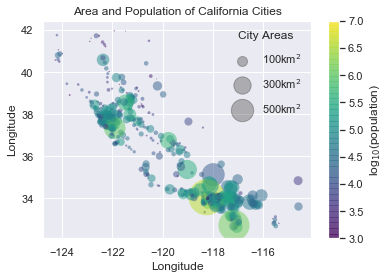

In [4]:
sns.set()
plt.scatter(longitude, latitude, label=None, 
            c=np.log10(population), # The power to which a base of 10 must be raised to obtain a number is called the common logarithm (log) of the number.,
            cmap='viridis', s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('Longitude')
plt.ylabel('Longitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# now we will craete a legend, we will plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area, label=str(area) + 'km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Areas')
plt.title("Area and Population of California Cities")
plt.show()

In [5]:
from mpl_toolkits.basemap import Basemap

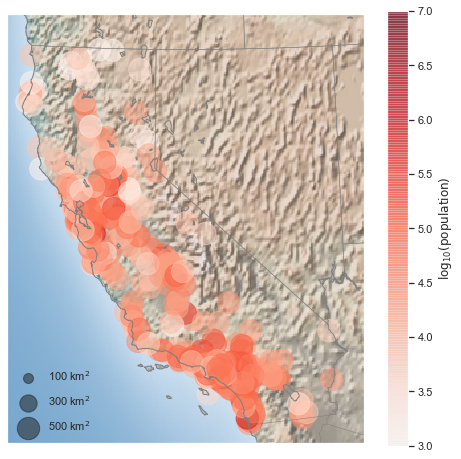

In [6]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(longitude.values, latitude.values, latlon=True,
          c=np.log10(population), s=area,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

This shows us roughly where larger populations of people have settled in California: they are clustered near the coast in the Los Angeles and San Francisco areas, stretched along the highways in the flat central valley, and avoiding almost completely the mountainous regions along the borders of the state.

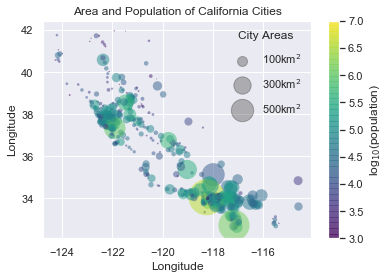